## Tugas 05 Machine Learning

Nama: Muh. Yusuf Syam<br>
NIM: H071191044

<h1 align="center">SVM & SVR Classification</h1><br>

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report, cohen_kappa_score, fbeta_score, confusion_matrix, auc, roc_curve

In [2]:
df= pd.read_csv('dataset_iris.csv')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.shape

(150, 5)

## Preprocessing

In [4]:
df_out= df.copy()
df_out.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Mengecek jika ada nilai NaN

In [5]:
df_out.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

Normalisasi

In [6]:
scaler = StandardScaler()
features= df_out.drop('Species', axis='columns')
scaled_features= scaler.fit_transform(features)

df_out= pd.concat([pd.DataFrame(data=scaled_features), df['Species']], axis='columns')
df_out.columns= df.columns
df_out.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,-0.900681,1.019004,-1.340227,-1.315444,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,setosa


Label Encoding

In [7]:
df_out['Species']= LabelEncoder().fit_transform(df_out['Species'])
df_out.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


Train Test Split

In [8]:
x= df_out.drop('Species', axis='columns')
y= df_out['Species']

x.head(), y.head()

(   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
 0     -0.900681     1.019004     -1.340227    -1.315444
 1     -1.143017    -0.131979     -1.340227    -1.315444
 2     -1.385353     0.328414     -1.397064    -1.315444
 3     -1.506521     0.098217     -1.283389    -1.315444
 4     -1.021849     1.249201     -1.340227    -1.315444,
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: Species, dtype: int32)

In [9]:
# Parameter stratify untuk membalance data
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, stratify= y)

print(len(x_train), len(x_test))

120 30


## Klasifikasi SVM

In [10]:
# Jika bingung mau pake kernel apa, maka kita bisa menguji satu2 kernelnya
list_kernel= ['linear', 'rbf', 'poly', 'sigmoid']

for i in list_kernel:
    temp_model= svm.SVC(kernel=i)
    temp_model.fit(x_train, y_train)
    
    print("{} Accuracy: {}".format(i, metrics.accuracy_score(y_test, temp_model.predict(x_test))))

linear Accuracy: 0.9666666666666667
rbf Accuracy: 0.9666666666666667
poly Accuracy: 0.9666666666666667
sigmoid Accuracy: 0.8666666666666667


Kita memilih kernel dengan accuraccy tertinggi

In [11]:
model_svm= svm.SVC(kernel='rbf') # Defaultnya juga rbf
model_svm.fit(x_train, y_train)

# Untuk model svr
# model_svr= svm.SVR(kernel='rbf')
# model_svr.fit(x_train, y_train)

y_predict= model_svm.predict(x_test)
y_predict[:5], y_test[:5]

(array([2, 1, 2, 0, 1]),
 109    2
 98     1
 139    2
 14     0
 85     1
 Name: Species, dtype: int32)

* Accuraccy score

In [12]:
accuraccy_score= metrics.accuracy_score(y_test, y_predict)
print("Accuraccy Score: {:.2f}%".format(accuraccy_score*100))

Accuraccy Score: 96.67%


* Confusion matrix

In [13]:
cm= confusion_matrix(y_test, y_predict, labels=df_out['Species'].unique())
print("Confusion matrix: \n{}".format(cm))

Confusion matrix: 
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


Confusion matrix visualization

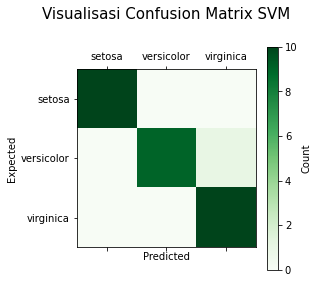

In [14]:
from matplotlib import pyplot as plt

plt.matshow(cm, cmap='Greens')

plt.colorbar().set_label('Count')

plt.xticks(ticks=[0,1,2], labels=df['Species'].unique())
plt.yticks(ticks=[0,1,2], labels=df['Species'].unique())

plt.xlabel('Predicted')
plt.ylabel('Expected')

plt.title('Visualisasi Confusion Matrix SVM', size=15, pad=50)
plt.show()

* Classification report

In [15]:
cr= classification_report(y_test, y_predict)
print("Classification report: \n{}".format(cr))

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



* Skor metrics lain

In [16]:
# cohen kappa score
cks= cohen_kappa_score(y_test, y_predict)

# fbeta score
fbeta= fbeta_score(y_test, y_predict, beta=0.5, average='micro')

# auc score
fpr, tpr, thresholds = roc_curve(y_test, y_predict, pos_label = 1)
auc_score= auc(fpr, tpr)

print("Cohen kappa score: {:.2f}%".format(cks*100))
print("Fbeta score: {:.2f}%".format(fbeta*100))
print("AUC score: {:.2f}%".format(auc_score*100))

Cohen kappa score: 95.00%
Fbeta score: 96.67%
AUC score: 52.50%


## SVR

In [17]:
model_svr= svm.SVR(kernel='linear')
model_svr.fit(x_train, y_train)

y_predict= model_svr.predict(x_test)
y_predict[:5], y_test[:5]

(array([ 2.16723702,  0.87109467,  1.81006818, -0.23139621,  1.39440878]),
 109    2
 98     1
 139    2
 14     0
 85     1
 Name: Species, dtype: int32)

Karena y_predict dari konsep svr berupa float, maka untuk menghitung score dan confusion matrixnya, kita akan membulatkannya

In [18]:
y_predict_rounded= y_predict.round()
y_predict_rounded

array([ 2.,  1.,  2., -0.,  1.,  0.,  1.,  1., -0.,  2.,  2.,  2.,  1.,
        1.,  2.,  2.,  1.,  2.,  1.,  2.,  0.,  1., -0.,  2., -0.,  0.,
       -0., -0.,  1., -0.])

* Accuraccy score

In [19]:
accuraccy_score= model_svr.score(x_test, y_test)
print("Accuraccy Score: {:.2f}%".format(accuraccy_score*100))

Accuraccy Score: 93.96%


* Confusion matrix

In [20]:
cm= confusion_matrix(y_test, y_predict_rounded, labels=df_out['Species'].unique())
print("Confusion matrix: \n{}".format(cm))

Confusion matrix: 
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


Confusion matrix visualization

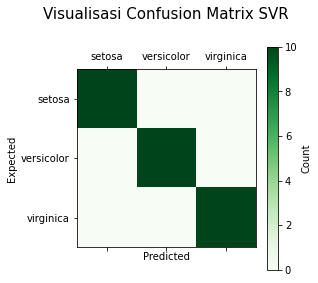

In [21]:
from matplotlib import pyplot as plt

plt.matshow(cm, cmap='Greens')

plt.colorbar().set_label('Count')

plt.xticks(ticks=[0,1,2], labels=df['Species'].unique())
plt.yticks(ticks=[0,1,2], labels=df['Species'].unique())

plt.xlabel('Predicted')
plt.ylabel('Expected')

plt.title('Visualisasi Confusion Matrix SVR', size=15, pad=50)
plt.show()

* Skor metrics lain

In [22]:
# cohen kappa score
cks= cohen_kappa_score(y_test, y_predict_rounded)

# fbeta score
fbeta= fbeta_score(y_test, y_predict_rounded, beta=0.5, average='micro')

# auc score
fpr, tpr, thresholds = roc_curve(y_test, y_predict_rounded, pos_label = 1)
auc_score= auc(fpr, tpr)

print("Cohen kappa score: {:.2f}%".format(cks*100))
print("Fbeta score: {:.2f}%".format(fbeta*100))
print("AUC score: {:.2f}%".format(auc_score*100))

Cohen kappa score: 100.00%
Fbeta score: 100.00%
AUC score: 50.00%
